# Physics 256
## Lecture 11 - Plot Types

<img src="http://matplotlib.org/_static/logo2.png" width=400px>

In [2]:
import style
style._set_css_style('../include/bootstrap.css')

## Last Time

### [Notebook Link: 10_PlotCustomization.ipynb](./10_PlotCustomization.ipynb)

- using LaTeX in plot labels
- meshgrid for multi-dimensional data sets
- plot customization

## Today

- plot types


## Plotting with Matplotlib

In [3]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Plot Types

Matplotlib includes almost any imaginable type of chart or graph.  A good starting point to determine what is the best type of graph for your particular data is:

In [ ]:
from IPython.display import Image
Image(filename='../data/choosing_a_good_chart.png')

### Histograms

In [ ]:
# get 10000 gaussian distributed random numbers
h = np.random.randn(10000)

# the number of bins for our histogram
numBins = 100
plt.hist(h,numBins,edgecolor='w', density=True, alpha=0.5)

# let's add the theoretical value
x = np.arange(-5,5,0.01)
y = np.exp(-x**2/2)/np.sqrt(2.0*np.pi)
plt.plot(x,y,'-', color=colors[0])

# we can save our figure to disk
#plt.savefig('output/histogram.pdf')

### Errorbars

In [ ]:
# errorbars
x = np.arange(0, 4, 0.2) 
y = np.exp(-x) 
dy = 0.1 * np.abs(np.random.randn(len(y))) 
dx = 0.1 * np.abs(np.random.randn(len(y))) 
plt.errorbar(x,y,xerr=dx,yerr=dy,marker='o',markersize=8.0,capsize=0.0,elinewidth=1.0)

### Bar charts

In [ ]:
bar = {'A': 40, 'B': 70, 'C': 30, 'D': 85} 
bar = sorted(bar.items())

keys = []
vals = []
for i,cbar in enumerate(bar): 
    plt.bar(i, cbar[1], alpha=0.5,color=colors[i])
    keys.append(cbar[0])
    vals.append(cbar[1])

plt.xticks(np.arange(len(bar))+0.4,keys)
plt.yticks(vals)

### Pie charts

In [ ]:
# pie chart
plt.figure(4,figsize=(6,6));
aleast = {'Boston':84, 'New York':103, 'Tampa Bay':96, 'Toronto':67, 'Baltimore':54}
explode = [0.0, 0.0, 0.0, 0.0, 0.1] 
plt.pie(list(aleast.values()), labels=list(aleast.keys()), explode=explode, autopct='%3.1f%%', colors=colors[:]); 

### Scatter plots

Useful and effecient for large amounts of data points

In [ ]:
# scatter graph
x = np.random.randn(1000) 
y = np.random.randn(1000) 
size = 50*np.random.randn(1000) 
col = np.random.rand(1000) 
plt.scatter(x, y, s=size, c=col)

### Polar plots

In [ ]:
# polar plot 
theta = np.linspace(0, 2.0*np.pi, 100) 
plt.polar(3*theta, theta/5); 
plt.polar(theta, np.cos(4*theta)); 

### Annotating plots

In [ ]:
# Produce a linear plot with an intercept
    
iL = np.linspace(0, 0.1, 100)
yint = 0.15
y = yint + 2.0*iL
plt.plot(iL,y,marker='None', linestyle='-')
plt.axis([0,0.09,0,0.4])
plt.xlabel(r'$1/L$')
plt.ylabel(r'$f(L)$')

# Our first label in data coordinates
plt.text(0.002,0.25,r'$f(0) = 0.15$', fontsize=18)
    
# The label in figure coordinates
plt.figtext(0.2,0.2,'intercept = 0.15', fontsize=18, color=colors[1])
    
# Add a label and an arrow
plt.annotate(r'$L \to \infty$',xy=(0, 0.15), xytext=(0.02, 0.08),\
             fontsize=30, color=colors[2],\
             arrowprops=dict(color=colors[2],shrink=0.1))

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
<h3> Determine a graphical solution for $x(a)$ (with at least 6 points) to the transcendental equation: </h3>
</div>
\begin{equation}
x = \tanh\left(\frac{x}{a} \right)
\end{equation}

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


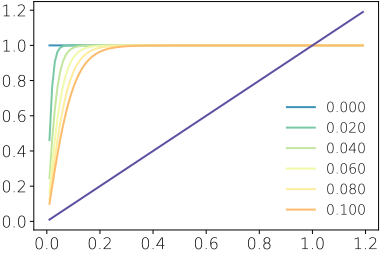

In [25]:
def trans(x,a):
    ''' A transcendental equationb x = tanh(x/a). '''
    return np.tanh(x/a)
    # add equation

# choose a range of a values and x values
# you might need to explore a bit with these
amin,amax = 0,0.1
xmin,xmax,Δx = 0.01,1.2,0.01
a = np.linspace(amin,amax,6)
x = np.arange(xmin,xmax,Δx)

# plot the LHS
plt.figure()
plt.plot(x,x,'-',zorder=10)

# Now plot the RHS for different values of a
for i,ca in enumerate(a):
    plt.plot(x, trans(x,ca),'-', label=f'{ca:5.3f}')

plt.legend()

Visually identiry solutions using the notebook feature and add the values of x here

In [23]:
sol = [1.01, 0.99, 0.97, 0.7, 0.2, 0]


Plot the solution

Text(0, 0.5, '$x$')

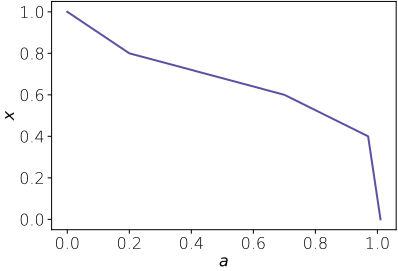

In [24]:
plt.figure()
plt.plot(sol, a)
plt.xlabel(r'$a$')
plt.ylabel(r'$x$')

In [ ]:
%load solutions/transcendental.py